# Preliminary look at Run 1 brick 44 data, compared to Muon and Neutrino MC

Let's start with the imports, and making the tick size large enough to be visible.

In [1]:
import ROOT
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas
from scipy import sparse
from scipy.optimize import curve_fit
import math
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 

Welcome to JupyROOT 6.26/10


## Real Emulsion Data (vtx)

Load data from Run 1, b000044

In [3]:
data_file = uproot.open("/eos/experiment/sndlhc/emulsionData/2022/CERN/emu_reco/RUN1/b000044/vertex_TMVA_nomaxape.root")
data_tree = data_file['vtx']


These are the variables we are provided

In [4]:
data_tree.keys()

['cellx',
 'celly',
 'vID',
 'vx',
 'vy',
 'vz',
 'ntrks',
 'nsegtot',
 'nseg',
 'npl',
 'fillfact',
 'fillfact_t',
 'meanIP',
 'ip',
 'prob',
 'maxaperture',
 'sChi2',
 'sW',
 'sVolume',
 'sTX',
 'sTY',
 'sPID',
 'sID',
 'BDT']

And we can select the variables we'd like to analyze:

In [5]:
branchnames = ['sTX', 'sTY', 'ntrks', 'nseg', 'npl', 'fillfact_t', 'fillfact', 'ip', 'maxaperture', 'sPID', 'prob', 'BDT']
data_vtx = data_tree.arrays(branchnames)

Npl is the number of plates the track passes, from the first to the last segment of the track. fillfact_t uses the nava, the number of plates from the first segment of the track to the end of the brick. For this analysis I'll compare nseg/npl

## Neutrino MC Data (vtx)

Load MC data from b000011

In [11]:
neutrino_file = uproot.open("/eos/user/a/aiulian/sim_fedra/nu_sim_activeemu_withcrisfiles_25_July_2022/b000011/vertextree_nocut.root")
neutrino_tree = neutrino_file['vtx']

Also load data with random cuts - removing 1 in 4, 6, or 8 segments

In [ ]:
neufile_4 = uproot.open("/eos/user/a/aiulian/sim_fedra/nu_sim_activeemu_withcrisfiles_25_July_2022/b000011/vertextree_rmseg_1in4.root")
neufile_6 = uproot.open("/eos/user/a/aiulian/sim_fedra/nu_sim_activeemu_withcrisfiles_25_July_2022/b000011/vertextree_rmseg_1in6.root")
neufile_8 = uproot.open("/eos/user/a/aiulian/sim_fedra/nu_sim_activeemu_withcrisfiles_25_July_2022/b000011/vertextree_rmseg_1in8.root")

neutree_4 = neufile_4['vtx']
neutree_6 = neufile_6['vtx']
neutree_8 = neufile_8['vtx']

In [12]:
branchnames = ['s/s.eTX', 's/s.eTY', 'n', 'nseg', 'npl', 'nholes', 'impactparameter', 'maxaperture', 'MCTrackPdgCode', 's/s.ePID', 'vz', 'n', 'flag', 's/s.eZ']
orig_neutrino_vtx = neutrino_tree.arrays(branchnames)
orig_neutrino_vtx['fillfact_t'] = orig_neutrino_vtx['nseg']/orig_neutrino_vtx['npl']


In [15]:
o_neuvtx_4 = neutree_4.arrays(branchnames)
o_neuvtx_6 = neutree_6.arrays(branchnames)
o_neuvtx_8 = neutree_8.arrays(branchnames)
o_neuvtx_4['fillfact_t'] = o_neuvtx_4['nseg']/o_neuvtx_4['npl']
o_neuvtx_6['fillfact_t'] = o_neuvtx_6['nseg']/o_neuvtx_6['npl']
o_neuvtx_8['fillfact_t'] = o_neuvtx_8['nseg']/o_neuvtx_8['npl']

Determine start and end z-positions of brick for selection

In [13]:
print("Neutrino sim min z:", ak.flatten(orig_neutrino_vtx['s/s.eZ'][orig_neutrino_vtx['s/s.ePID']==0])[0])
print("Neutrino sim max z:", ak.flatten(orig_neutrino_vtx['s/s.eZ'][orig_neutrino_vtx['s/s.ePID']==58])[0])

Neutrino sim min z: 0.0
Neutrino sim max z: -76270.0


## Muon MC Data (vtx)

Load MC data from b000011

In [13]:
muon_file = uproot.open("/eos/user/a/aiulian/sim_fedra/muonbkg_1E5cm2_b000011/b000011/vertextree_nocut.root")
muon_tree = muon_file['vtx']

Also load data with random cuts - removing 1 in 4, 6, or 8 segments

In [13]:
mufile_4 = uproot.open("/eos/user/a/aiulian/sim_fedra/muonbkg_1E5cm2_b000011/b000011/vertextree_rmseg_1in4.root")
mufile_6 = uproot.open("/eos/user/a/aiulian/sim_fedra/muonbkg_1E5cm2_b000011/b000011/vertextree_rmseg_1in6.root")
mufile_8 = uproot.open("/eos/user/a/aiulian/sim_fedra/muonbkg_1E5cm2_b000011/b000011/vertextree_rmseg_1in8.root")

mutree_4 = mufile_4['vtx']
mutree_6 = mufile_6['vtx']
mutree_8 = mufile_8['vtx']

In [14]:
branchnames = ['s/s.eTX', 's/s.eTY', 'n', 'nseg', 'npl', 'nholes', 'impactparameter', 'maxaperture', 'MCTrackPdgCode', 's/s.ePID', 'vz', 'n', 'flag', 's/s.eZ']
orig_muon_vtx = muon_tree.arrays(branchnames)# , cut='(vz<-74967.80) & (vz > 0) & (n < 3) & (flag==0 | flag==3)')
orig_muon_vtx['fillfact_t'] = orig_muon_vtx['nseg']/orig_muon_vtx['npl']


In [16]:
o_muvtx_4 = mutree_4.arrays(branchnames)
o_muvtx_6 = mutree_4.arrays(branchnames)
o_muvtx_8 = mutree_4.arrays(branchnames)
o_muvtx_4['fillfact_t'] = o_muvtx_4['nseg']/o_muvtx_4['npl']
o_muvtx_6['fillfact_t'] = o_muvtx_6['nseg']/o_muvtx_6['npl']
o_muvtx_8['fillfact_t'] = o_muvtx_8['nseg']/o_muvtx_8['npl']

In [19]:
print("Muon sim min z:", ak.flatten(orig_muon_vtx['s/s.eZ'][orig_muon_vtx['s/s.ePID']==0])[0])
print("Muon sim max z:", ak.flatten(orig_muon_vtx['s/s.eZ'][orig_muon_vtx['s/s.ePID']==59])[0])

Muon sim min z: 0.0
Muon sim max z: -77585.0


## Cuts on MC Data (which have already been applied to real data)

In [15]:
def cut_v(vz, n, flag):
    zmin=-77585
    zmax=0
    return [True if (vz[j]<zmax and vz[j]>zmin and n[j]>=3 and (flag[j]==0 or flag[j]==3)) else False for j in range(len(flag))]


In [16]:
neutrino_vtx = orig_neutrino_vtx[cut_v(orig_neutrino_vtx['vz'], orig_neutrino_vtx['n'], orig_neutrino_vtx['flag'])]
#neu4_vtx = o_neuvtx_4[cut_v(o_neuvtx_4['vz'], o_neuvtx_4['n'], o_neuvtx_4['flag'])]
#neu6_vtx = o_neuvtx_6[cut_v(o_neuvtx_6['vz'], o_neuvtx_6['n'], o_neuvtx_6['flag'])]
#neu8_vtx = o_neuvtx_8[cut_v(o_neuvtx_8['vz'], o_neuvtx_8['n'], o_neuvtx_8['flag'])]

In [17]:
def cut_m(vz, n, flag):
    zmin=-77585
    zmax=0
    return [True if (vz[j]<zmax and vz[j]>zmin and n[j]>=3 and (flag[j]==0 or flag[j]==3)) else False for j in range(len(flag))]


In [18]:
muon_vtx = orig_muon_vtx[cut_m(orig_muon_vtx['vz'], orig_muon_vtx['n'], orig_muon_vtx['flag'])]
#mu4_vtx = o_muvtx_4[cut_m(o_muvtx_4['vz'], o_muvtx_4['n'], o_muvtx_4['flag'])]
#mu6_vtx = o_muvtx_6[cut_m(o_muvtx_6['vz'], o_muvtx_6['n'], o_muvtx_6['flag'])]
#mu8_vtx = o_muvtx_8[cut_m(o_muvtx_8['vz'], o_muvtx_8['n'], o_muvtx_8['flag'])]

We can then look at the distributions of base track angles after the cuts are applied

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), tight_layout=True)
thres = 0.06
range_=((-1*thres, thres), (-1*thres, thres))
hist1 = ax[0].hist2d(np.asarray(ak.flatten(data_vtx['sTX'])), np.asarray(ak.flatten(data_vtx['sTY'])), bins=200, range=range_)
hist2 = ax[1].hist2d(np.asarray(ak.flatten(neutrino_vtx['s/s.eTX'])), np.asarray(ak.flatten(neutrino_vtx['s/s.eTY'])), bins=200, range=range_)
hist3 = ax[2].hist2d(np.asarray(ak.flatten(muon_vtx['s/s.eTX'])), np.asarray(ak.flatten(muon_vtx['s/s.eTY'])), bins=200, range=range_)
ax[0].set_xlabel("X-Z Angle of Tracks (rad)", fontsize=14)
ax[0].set_ylabel("Y-Z Angle of Tracks (rad)", fontsize=14)
ax[1].set_xlabel("X-Z Angle of Tracks (rad)", fontsize=14)
ax[1].set_ylabel("Y-Z Angle of Tracks (rad)", fontsize=14)
ax[2].set_xlabel("X-Z Angle of Tracks (rad)", fontsize=14)
ax[2].set_ylabel("Y-Z Angle of Tracks (rad)", fontsize=14)
ax[0].set_title("Data", fontsize=16)
ax[1].set_title("Neutrino MC", fontsize=16)
ax[2].set_title("Muon MC", fontsize=16)

fig.colorbar(hist1[3], ax=ax[0])
fig.colorbar(hist2[3], ax=ax[1])
fig.colorbar(hist3[3], ax=ax[2])
plt.grid(False)
plt.savefig("Figures/RealVSim/AngularDist_2dHist_SameCuts.pdf")
plt.show()

We can look at the same data on a log scale too!

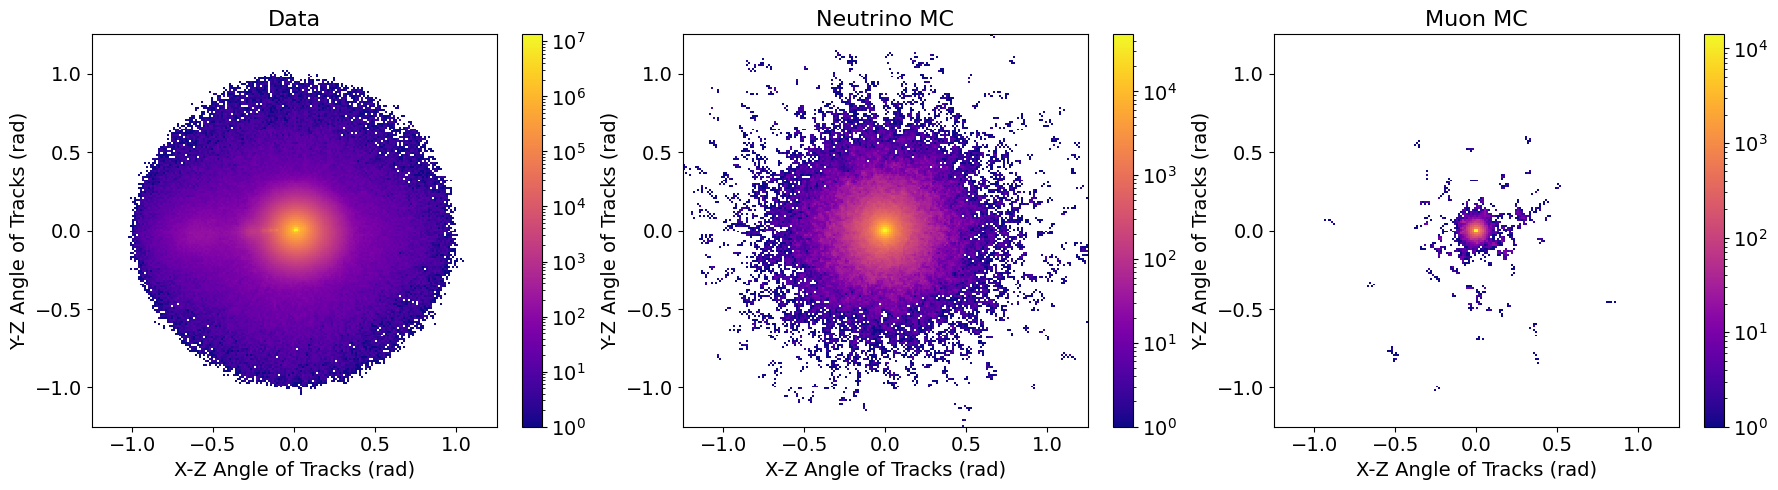

In [185]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), tight_layout=True)
thres = 1.25
range_=((-1*thres, thres), (-1*thres, thres))
hist1 = ax[0].hist2d(np.asarray(ak.flatten(data_vtx['sTX'])), np.asarray(ak.flatten(data_vtx['sTY'])), bins=200, cmap=mpl.colormaps['plasma'], norm= mpl.colors.LogNorm(), range=range_)
hist2 = ax[1].hist2d(np.asarray(ak.flatten(neutrino_vtx['s/s.eTX'])), np.asarray(ak.flatten(neutrino_vtx['s/s.eTY'])), bins=200, cmap=mpl.colormaps['plasma'], norm= mpl.colors.LogNorm(), range=range_)
hist3 = ax[2].hist2d(np.asarray(ak.flatten(muon_vtx['s/s.eTX'])), np.asarray(ak.flatten(muon_vtx['s/s.eTY'])), bins=200, cmap=mpl.colormaps['plasma'], norm= mpl.colors.LogNorm(), range=range_)
ax[0].set_xlabel("X-Z Angle of Tracks (rad)", fontsize=14)
ax[0].set_ylabel("Y-Z Angle of Tracks (rad)", fontsize=14)
ax[1].set_xlabel("X-Z Angle of Tracks (rad)", fontsize=14)
ax[1].set_ylabel("Y-Z Angle of Tracks (rad)", fontsize=14)
ax[2].set_xlabel("X-Z Angle of Tracks (rad)", fontsize=14)
ax[2].set_ylabel("Y-Z Angle of Tracks (rad)", fontsize=14)
ax[0].set_title("Data", fontsize=16)
ax[1].set_title("Neutrino MC", fontsize=16)
ax[2].set_title("Muon MC", fontsize=16)
fig.colorbar(hist1[3], ax=ax[0])
fig.colorbar(hist2[3], ax=ax[1])
fig.colorbar(hist3[3], ax=ax[2])
fig.tight_layout()
plt.grid(False)
plt.savefig("Figures/RealVSim/AngularDist_2dHist_log_SameCuts.pdf")
plt.show()

## Comparing Data to Neutrino and Muon MC

In [21]:
thres + zero_y

0.016

### Angular Distribution of Base Tracks

First, I looked at the 2D angular distribution of base tracks in the data, and fit gaussians to the x- and y- angular distributions independently

Peak x position 
x:  0.011700000000000006 
y:  325039.82808289037
Peak y position 
x:  0.006699999999999982 
y:  296028.8502334499
Fit x: 
 A =  230270.9426898723 
 B =  32838.89528331058 
 C =  -94780.80789965682 
 D =  0.011660292223453845
Fit y: 
 A =  219081.06863434115 
 B =  19076.466823004695 
 C =  -76953.13068305988 
 D =  0.006664224067552622


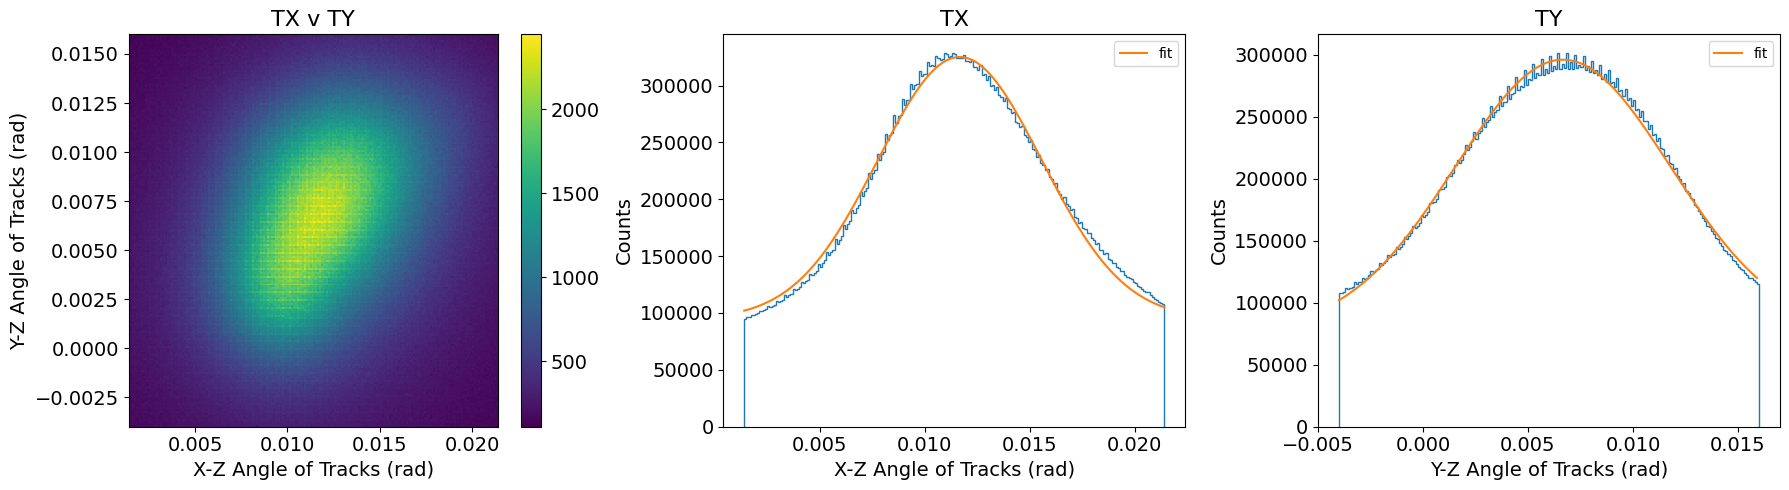

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), tight_layout=True)
thres = 0.01
zero_x = 0.0114
zero_y = 0.006
range_=((-1*thres + zero_x, thres + zero_x), (-1*thres + zero_y, thres + zero_y))


# setting up gaussian fits
counts_x, bins_x = np.histogram(np.asarray(ak.flatten(data_vtx['sTX'])), bins=200, range=range_[0])
counts_y, bins_y = np.histogram(np.asarray(ak.flatten(data_vtx['sTY'])), bins=200, range=range_[1])

# Define the Gaussian function
def Gauss(x, A, B, C, D):
    y = A*np.exp(-1*B*(x-D)**2)-C
    return y

px, covx = curve_fit(Gauss, bins_x[:-1], counts_x, p0=[1e6, 1000, 0, 0.01])
py, covy = curve_fit(Gauss, bins_y[:-1], counts_y, p0=[1e5, 1000, 0, 0.01])

fitx_A = px[0]
fitx_B = px[1]
fitx_C = px[2]
fitx_D = px[3]
fity_A = py[0]
fity_B = py[1]
fity_C = py[2]
fity_D = py[3]

xvals = np.arange(range_[0][0], range_[0][1], thres/100)
yvals = np.arange(range_[1][0], range_[1][1], thres/100)
fit_x = Gauss(xvals, fitx_A, fitx_B, fitx_C, fitx_D)
fit_y = Gauss(yvals, fity_A, fity_B, fity_C, fity_D)

print('Peak x position \nx: ', xvals[(fit_x.tolist()).index(max(fit_x))], "\ny: ",  max(fit_x))
print('Peak y position \nx: ', yvals[(fit_y.tolist()).index(max(fit_y))], "\ny: ",  max(fit_y))
print('Fit x: \n A = ', fitx_A, "\n B = ", fitx_B,  "\n C = ", fitx_C,  "\n D = ", fitx_D) 
print('Fit y: \n A = ', fity_A, "\n B = ", fity_B,  "\n C = ", fity_C,  "\n D = ", fity_D) 


hist1 = ax[0].hist2d(np.asarray(ak.flatten(data_vtx['sTX'])), np.asarray(ak.flatten(data_vtx['sTY'])), bins=200, range=range_)
hist2 = ax[1].stairs(counts_x, bins_x)
ax[1].plot(xvals, fit_x, '-', label='fit')
hist3 = ax[2].stairs(counts_y, bins_y)
ax[2].plot(yvals, fit_y, '-', label='fit')
ax[0].set_xlabel("X-Z Angle of Tracks (rad)", fontsize=14)
ax[0].set_ylabel("Y-Z Angle of Tracks (rad)", fontsize=14)
ax[1].set_xlabel("X-Z Angle of Tracks (rad)", fontsize=14)
ax[1].set_ylabel("Counts", fontsize=14)
ax[2].set_xlabel("Y-Z Angle of Tracks (rad)", fontsize=14)
ax[2].set_ylabel("Counts", fontsize=14)
ax[0].set_title("TX v TY", fontsize=16)
ax[1].set_title("TX", fontsize=16)
ax[2].set_title("TY", fontsize=16)


fig.colorbar(hist1[3], ax=ax[0])
ax[1].legend()
ax[2].legend()
plt.grid(False)
plt.savefig("Figures/RealVSim/AngularDist_Data_GaussFits_01.pdf")
plt.show()

From the fit parameters, we can also get the standard deviation of the gaussians

In [4]:
print("sd x = ", math.sqrt(1/32838.89528331058/2))
print("sd y = ", math.sqrt(1/19076.466823004695/2))

sd x =  0.0039020311563558925
sd y =  0.00511960001162609


However, this fit isn't perfect, so we'll probably want a more complex fit later on if we need to quantify the shape. Let's now think about what happens if you make cuts on the angle, removing a hole of the shallowest angles? How many neutrinos would this eliminate? To start, let's do this on the already-reconstructed data we have here. 

Idea: This might eliminate more background (muons) than signal (neutrinos) which would allow for improved signal to background ratio. 


In [186]:
angles = [0.01, 0.02, 0.05, 0.1, 0.2]
muon_x = np.asarray(ak.flatten(muon_vtx['s/s.eTX']))
muon_y = np.asarray(ak.flatten(muon_vtx['s/s.eTY']))
neutrino_x = np.asarray(ak.flatten(neutrino_vtx['s/s.eTX']))
neutrino_y = np.asarray(ak.flatten(neutrino_vtx['s/s.eTY']))
keep_muon = []
keep_neutrino = []
for ang in range(len(angles)):
    keep_muon += [[]]
    keep_neutrino += [[]]
    for i in range(len(muon_x)):
        if (muon_x[i]**2 + muon_y[i]**2) >= angles[ang]:
            keep_muon[ang] += [(muon_x[i], muon_y[i])]
    for i in range(len(neutrino_x)):
        if (neutrino_x[i]**2 + neutrino_y[i]**2) >= angles[ang]:
            keep_neutrino[ang] += [(neutrino_x[i], neutrino_y[i])]
    print(angles[ang])

0.01
0.02
0.05
0.1
0.2


In [207]:
for ang in range(len(angles)):
    print(angles[ang], "rad cut:\n\t", len(keep_muon[ang]), "muon base tracks out of", len(muon_x), "(", len(keep_muon[ang])/len(muon_x),")", 
          "\n\t", len(keep_neutrino[ang]), "neutrino base tracks out of", len(neutrino_x), "(", len(keep_neutrino[ang])/len(neutrino_x),")")    

0.01 rad cut:
	 2131 muon base tracks out of 77825 ( 0.027381946675232895 ) 
	 421203 neutrino base tracks out of 1352780 ( 0.3113610490988927 )
0.02 rad cut:
	 1256 muon base tracks out of 77825 ( 0.016138772887889497 ) 
	 300773 neutrino base tracks out of 1352780 ( 0.22233696536022118 )
0.05 rad cut:
	 746 muon base tracks out of 77825 ( 0.0095856087375522 ) 
	 165061 neutrino base tracks out of 1352780 ( 0.12201614453200077 )
0.1 rad cut:
	 341 muon base tracks out of 77825 ( 0.004381625441696113 ) 
	 88673 neutrino base tracks out of 1352780 ( 0.0655487218912166 )
0.2 rad cut:
	 136 muon base tracks out of 77825 ( 0.0017475104400899455 ) 
	 37249 neutrino base tracks out of 1352780 ( 0.027535149839589587 )


For the 5 cuts we chose, it seems that we're keeping more of the neutrino base tracks than the muons, but we are still losing most of the neutrinos, which isn't great considering we don't have too many of those to begin with! We can see this more clearly on the plot below:

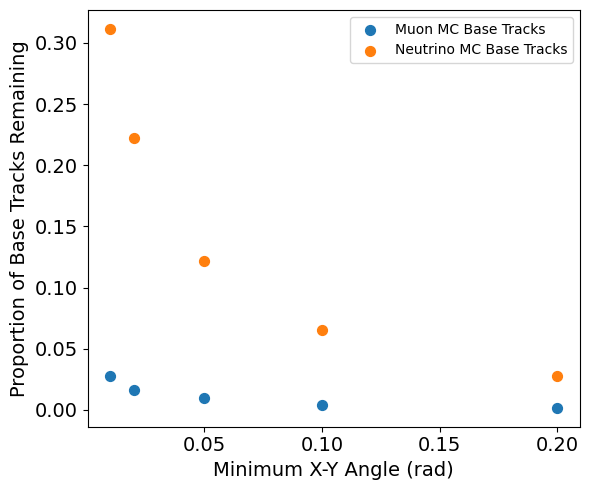

In [206]:
fig, ax = plt.subplots(1, figsize=(6,5), tight_layout=True)
ax.scatter(angles, [len(keep_muon[ang])/len(muon_x) for ang in range(len(angles))], label="Muon MC Base Tracks", s=50)
ax.scatter(angles, [len(keep_neutrino[ang])/len(neutrino_x) for ang in range(len(angles))], label="Neutrino MC Base Tracks", s=50)
ax.set_xlabel("Minimum X-Y Angle (rad)", fontsize=14)
ax.set_ylabel("Proportion of Base Tracks Remaining", fontsize=14)
plt.legend()
plt.savefig("Figures/RealVSim/AngularCuts_Scatter_SameCuts.pdf")
plt.show()

### Number of tracks per vertex

We can look at the number of tracks per vertex to see how the data compares to the MC. It appears to line up fairly well with the Muon MC, as expected, until the counts get very small:

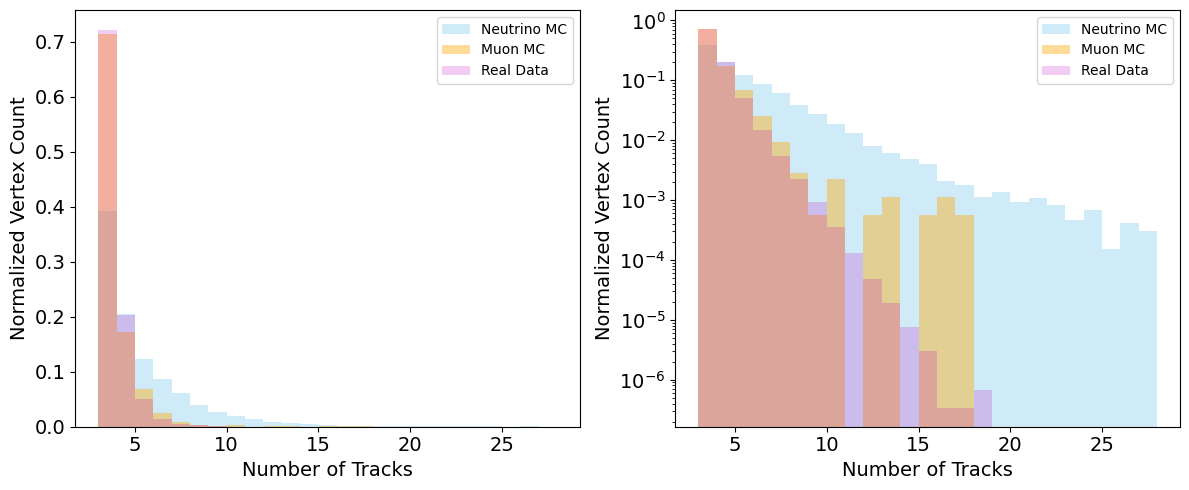

In [188]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)
bins_ = np.arange(3, 29, 1)
alpha = 0.4
ax[0].hist(np.asarray(neutrino_vtx['n']), bins=bins_, alpha=alpha, density=True, label="Neutrino MC", color='skyblue')
ax[0].hist(np.asarray(muon_vtx['n']), bins=bins_, alpha=alpha, density=True, label="Muon MC", color='orange')
ax[0].hist(np.asarray(data_vtx['ntrks']), bins=bins_, alpha=alpha-0.2, density=True, label="Real Data", color='m')

ax[0].set_xlabel("Number of Tracks", fontsize=14)
ax[0].set_ylabel("Normalized Vertex Count", fontsize=14)
ax[0].legend()
ax[1].hist(np.asarray(neutrino_vtx['n']), bins=bins_, alpha=alpha, density=True, label="Neutrino MC", color='skyblue')
ax[1].hist(np.asarray(muon_vtx['n']), bins=bins_, alpha=alpha, density=True, label="Muon MC", color='orange')
ax[1].hist(np.asarray(data_vtx['ntrks']), bins=bins_, alpha=alpha-0.2, density=True, label="Real Data", color='m', log=True)

ax[1].set_xlabel("Number of Tracks", fontsize=14)
ax[1].set_ylabel("Normalized Vertex Count", fontsize=14)
ax[1].legend()
plt.savefig("Figures/RealVSim/Ntrks_1dHist_SameCuts.pdf")
plt.show()

We can also look at just the data alone:

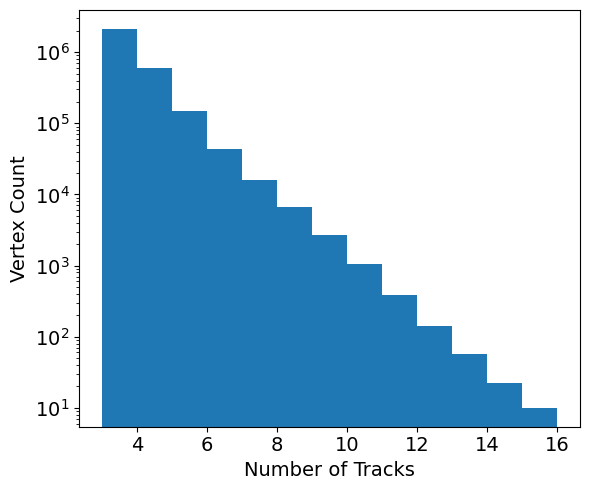

In [131]:
fig, ax = plt.subplots(1, figsize=(6, 5), tight_layout=True)
ax.hist(np.asarray(data_vtx['ntrks']), bins=np.arange(3, 17, 1), log=True)
ax.set_xlabel("Number of Tracks", fontsize=14)
ax.set_ylabel("Vertex Count", fontsize=14)
plt.savefig("Figures/RealVtxData/Ntrks_1dHist_log.pdf")
plt.show()

### Number of segments in each vertex

We can first look at the data alone, both with a linear and log scale:

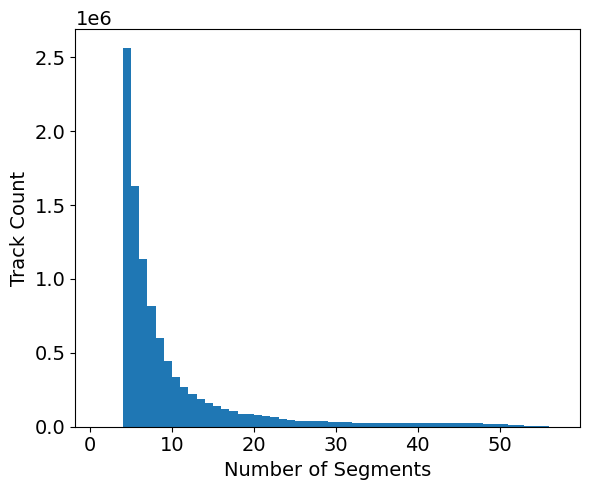

In [57]:
fig, ax = plt.subplots(1, figsize=(6, 5), tight_layout=True)
ax.hist(np.asarray(ak.flatten(data_vtx['nseg'])), bins=np.arange(1, 58, 1))
ax.set_xlabel("Number of Segments", fontsize=14)
ax.set_ylabel("Track Count", fontsize=14)
plt.savefig("Figures/RealVtxData/Nseg_1dHist.pdf")
plt.show()

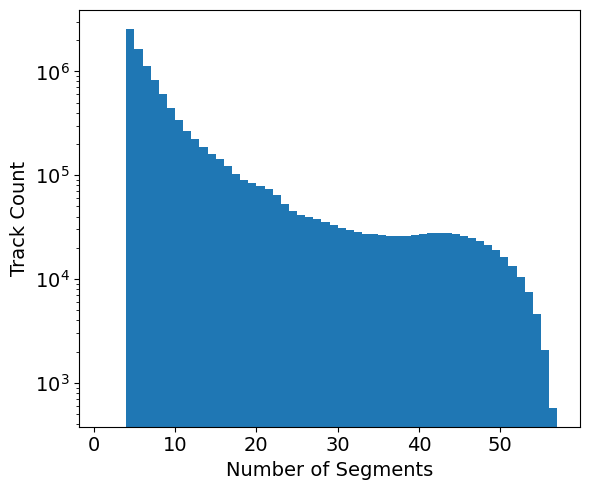

In [58]:
fig, ax = plt.subplots(1, figsize=(6, 5), tight_layout=True)
ax.hist(np.asarray(ak.flatten(data_vtx['nseg'])), bins=np.arange(1, 58, 1), log=True)
ax.set_xlabel("Number of Segments", fontsize=14)
ax.set_ylabel("Track Count", fontsize=14)
plt.savefig("Figures/RealVtxData/Nseg_1dHist_log.pdf")
plt.show()

We can then compare the data to MC, and see that it lines up fairly well with the muon MC as expected. The MC has 60 plates while the data only has 57, and the muons have a bit more of a peak towards the end compared to the data, as many of them pass through all plates. However, this might be explained by inefficiencies in scanning/reconstruction that aren't accounted for in the MC

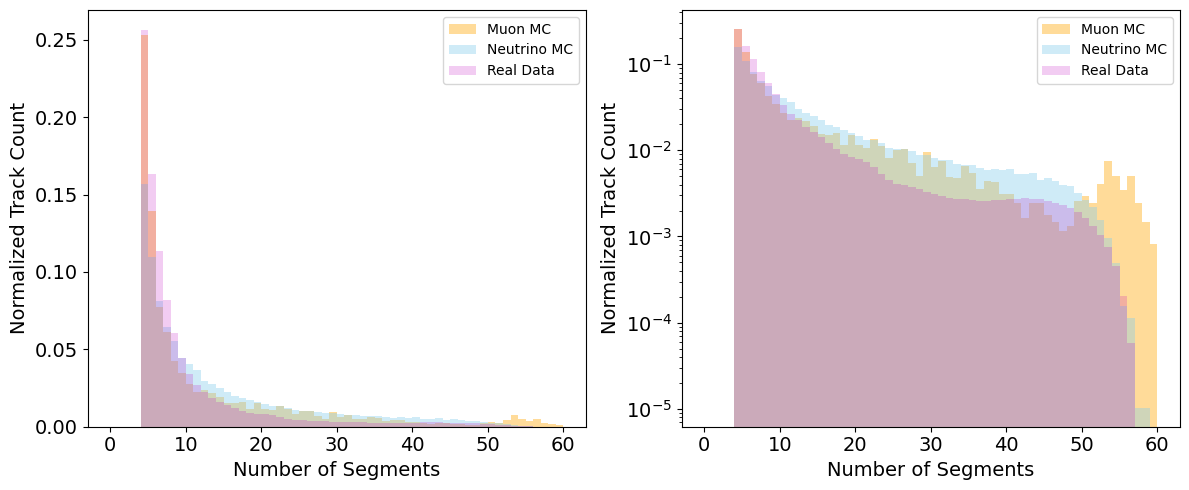

In [189]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)
bins_ = np.arange(0, 61, 1)
alpha = 0.4
ax[0].hist(np.asarray(ak.flatten(muon_vtx['nseg'])), bins=bins_, alpha=alpha, density=True, label="Muon MC", color='orange')
ax[0].hist(np.asarray(ak.flatten(neutrino_vtx['nseg'])), bins=bins_, alpha=alpha, density=True, label="Neutrino MC", color='skyblue')
ax[0].hist(np.asarray(ak.flatten(data_vtx['nseg'])), bins=bins_, alpha=alpha-0.2, density=True, label="Real Data", color='m')

ax[0].set_xlabel("Number of Segments", fontsize=14)
ax[0].set_ylabel("Normalized Track Count", fontsize=14)
ax[0].legend()
ax[1].hist(np.asarray(ak.flatten(muon_vtx['nseg'])), bins=bins_, alpha=alpha, density=True, label="Muon MC", color='orange')
ax[1].hist(np.asarray(ak.flatten(neutrino_vtx['nseg'])), bins=bins_, alpha=alpha, density=True, label="Neutrino MC", color='skyblue')
ax[1].hist(np.asarray(ak.flatten(data_vtx['nseg'])), bins=bins_, alpha=alpha-0.2, density=True, label="Real Data", color='m', log=True)

ax[1].set_xlabel("Number of Segments", fontsize=14)
ax[1].set_ylabel("Normalized Track Count", fontsize=14)
ax[1].legend()
plt.savefig("Figures/RealVSim/Nseg_1dHist_SameCuts.pdf")
plt.show()

We can also see a 2D histogram of the number of segments in a vertex vs the number of tracks in a vertex. 

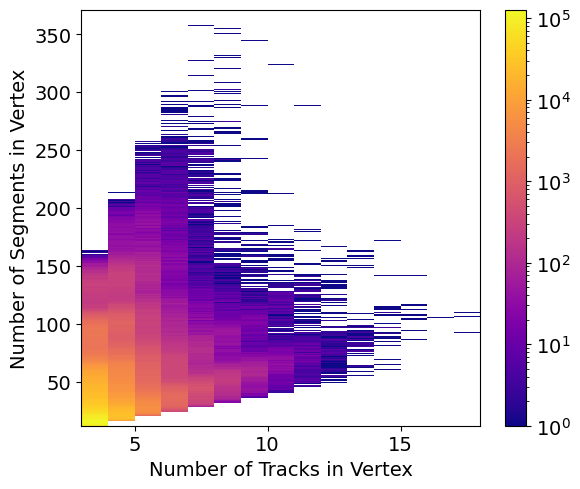

In [141]:
fig, ax = plt.subplots(1, figsize=(6, 5), tight_layout=True)
thres = 1
range_=((-1*thres, thres), (-1*thres, thres))
hist1 = ax.hist2d(np.asarray((data_vtx['ntrks'])), np.asarray(ak.sum(data_vtx['nseg'], axis=1)), bins=[np.arange(3, 19, 1), np.arange(12, 372, 1)], cmap=mpl.colormaps['plasma'], norm= mpl.colors.LogNorm())
ax.set_xlabel("Number of Tracks in Vertex", fontsize=14)
ax.set_xticks(np.arange(5, 20, 5))
ax.set_ylabel("Number of Segments in Vertex", fontsize=14)
fig.colorbar(hist1[3], ax=ax)
fig.tight_layout()
plt.grid(False)
#plt.savefig("Figures/RealVtxData/ntrks_nseg_2dHist_log.pdf")
plt.show()

We can make this plot also for the MC simulations as well. There is a characteristic drop off at the center of the distribution for the data, which can also be seen in the muon MC. This lines up as expected

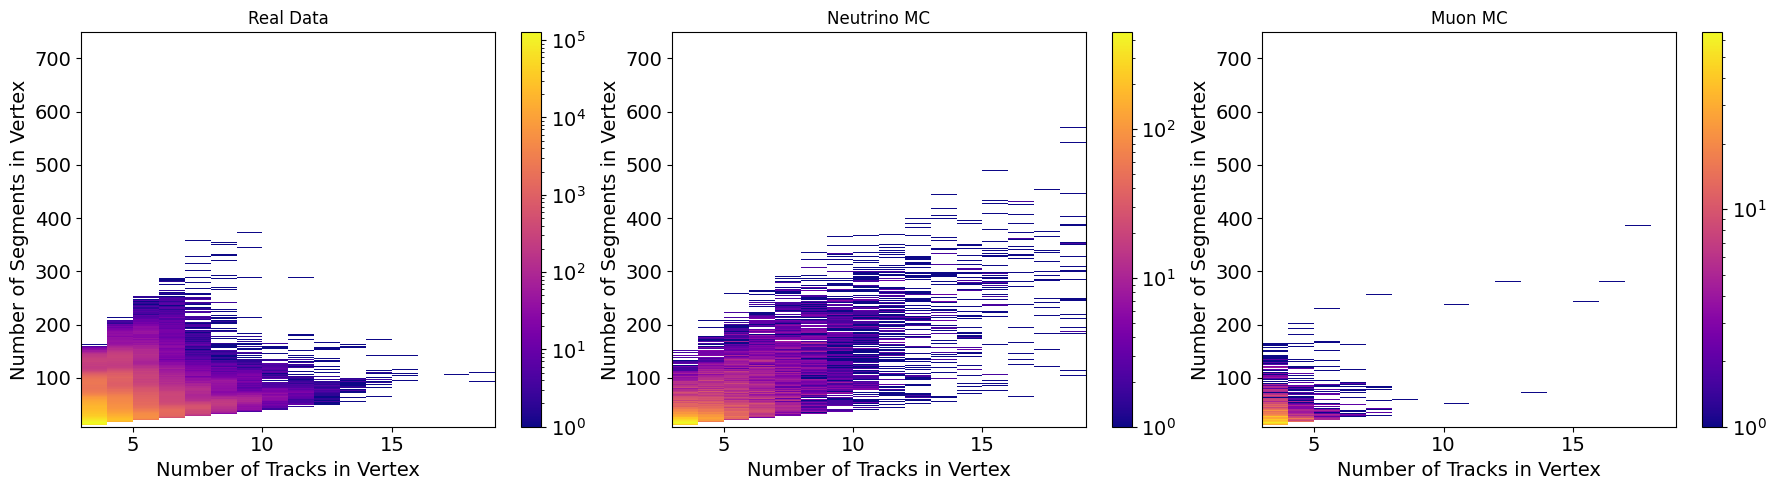

In [190]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), tight_layout=True)
max_y = 750
hist1 = ax[0].hist2d(np.asarray((data_vtx['ntrks'])), np.asarray(ak.sum(data_vtx['nseg'], axis=1)), bins=[np.arange(3, 20, 1), np.arange(8, max_y, 1)], cmap=mpl.colormaps['plasma'], norm= mpl.colors.LogNorm())
hist2 = ax[1].hist2d(np.asarray((neutrino_vtx['n'])), np.asarray(ak.sum(neutrino_vtx['nseg'], axis=1)), bins=[np.arange(3, 20, 1), np.arange(8, max_y, 1)], cmap=mpl.colormaps['plasma'], norm= mpl.colors.LogNorm())
hist3 = ax[2].hist2d(np.asarray((muon_vtx['n'])), np.asarray(ak.sum(muon_vtx['nseg'], axis=1)), bins=[np.arange(3, 20, 1), np.arange(8, max_y, 1)], cmap=mpl.colormaps['plasma'], norm= mpl.colors.LogNorm())

ax[0].set_xlabel("Number of Tracks in Vertex", fontsize=14)
ax[0].set_xticks(np.arange(5, 20, 5))
ax[0].set_ylabel("Number of Segments in Vertex", fontsize=14)
ax[1].set_xlabel("Number of Tracks in Vertex", fontsize=14)
ax[1].set_xticks(np.arange(5, 20, 5))
ax[1].set_ylabel("Number of Segments in Vertex", fontsize=14)
ax[2].set_xlabel("Number of Tracks in Vertex", fontsize=14)
ax[2].set_xticks(np.arange(5, 20, 5))
ax[2].set_ylabel("Number of Segments in Vertex", fontsize=14)
ax[0].set_title("Real Data")
ax[1].set_title("Neutrino MC")
ax[2].set_title("Muon MC")
fig.colorbar(hist1[3], ax=ax[0])
fig.colorbar(hist2[3], ax=ax[1])
fig.colorbar(hist3[3], ax=ax[2])

fig.tight_layout()
plt.grid(False)
plt.savefig("Figures/RealVSim/ntrks_nseg_2dHist_log_SameCuts.pdf")
plt.show()

### Number of plates

The next variable is the number of plates a track passes through, both on a linear and log scale

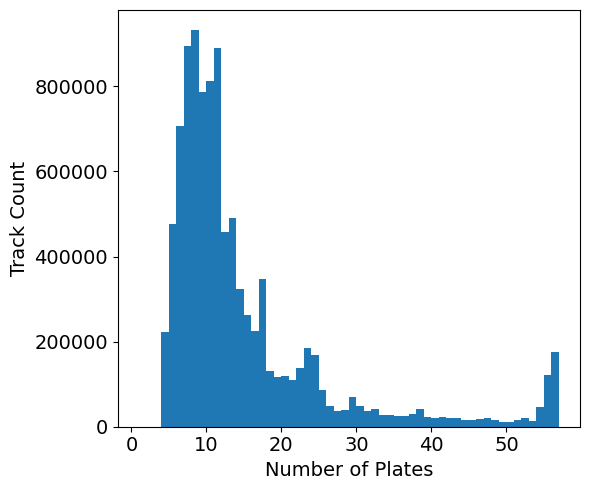

In [93]:
fig, ax = plt.subplots(1, figsize=(6, 5), tight_layout=True)
ax.hist(np.asarray(ak.flatten(data_vtx['npl'])), bins=np.arange(1, 58, 1))
ax.set_xlabel("Number of Plates", fontsize=14)
ax.set_ylabel("Track Count", fontsize=14)
plt.savefig("Figures/RealVtxData/Npl_1dHist.pdf")
plt.show()

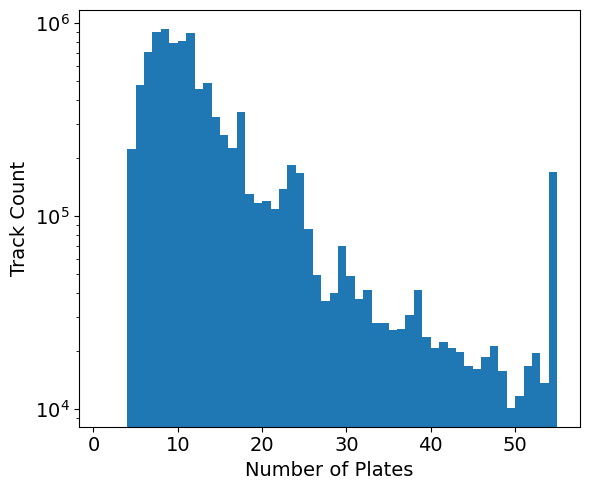

In [102]:
fig, ax = plt.subplots(1, figsize=(6, 5), tight_layout=True)
ax.hist(np.asarray(ak.flatten(data_vtx['npl'])), bins=np.arange(1, 56, 1), log=True)
ax.set_xlabel("Number of Plates", fontsize=14)
ax.set_ylabel("Track Count", fontsize=14)
plt.savefig("Figures/RealVtxData/Npl_1dHist_log.pdf")
plt.show()

We also verify again that the data lines up approximately with MC, as expected.

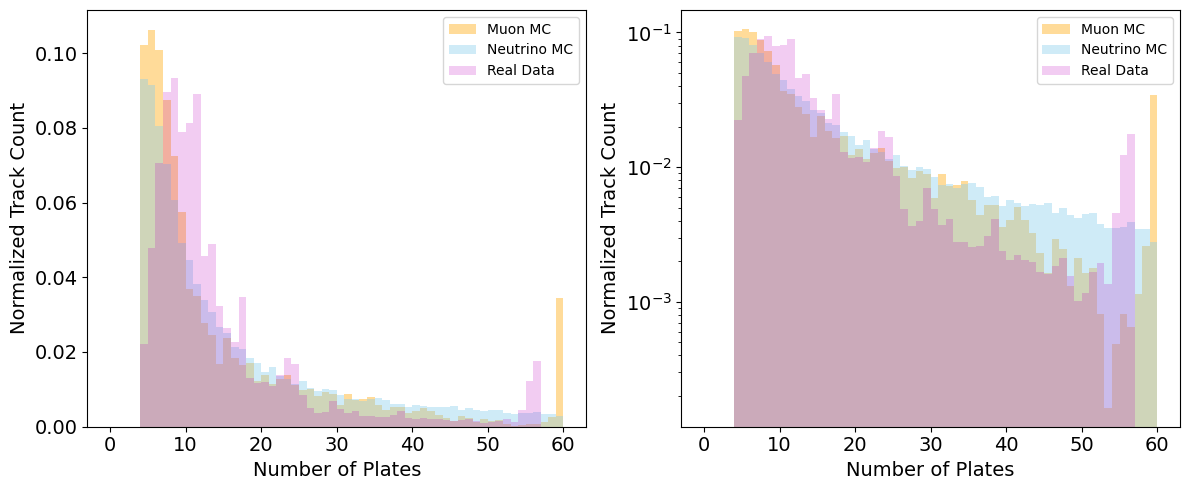

In [191]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)
bins_ = np.arange(0, 61, 1)
alpha = 0.4
ax[0].hist(np.asarray(ak.flatten(muon_vtx['npl'])), bins=bins_, alpha=alpha, density=True, label="Muon MC", color='orange')
ax[0].hist(np.asarray(ak.flatten(neutrino_vtx['npl'])), bins=bins_, alpha=alpha, density=True, label="Neutrino MC", color='skyblue')
ax[0].hist(np.asarray(ak.flatten(data_vtx['npl'])), bins=bins_, alpha=alpha-0.2, density=True, label="Real Data", color='m')

ax[0].set_xlabel("Number of Plates", fontsize=14)
ax[0].set_ylabel("Normalized Track Count", fontsize=14)
ax[0].legend()
ax[1].hist(np.asarray(ak.flatten(muon_vtx['npl'])), bins=bins_, alpha=alpha, density=True, label="Muon MC", color='orange')
ax[1].hist(np.asarray(ak.flatten(neutrino_vtx['npl'])), bins=bins_, alpha=alpha, density=True, label="Neutrino MC", color='skyblue')
ax[1].hist(np.asarray(ak.flatten(data_vtx['npl'])), bins=bins_, alpha=alpha-0.2, density=True, label="Real Data", color='m', log=True)

ax[1].set_xlabel("Number of Plates", fontsize=14)
ax[1].set_ylabel("Normalized Track Count", fontsize=14)
ax[1].legend()
plt.savefig("Figures/RealVSim/Npl_1dHist_SameCuts.pdf")
plt.show()

### Plate Number
We can see that there are certain dips in the Plate Numbers (Plate Number = # Plates - plateID, # Plates = 57 for data, 60 for MC) for the data, whereas the MC is a fairly smooth drop-off. We wanted to check whether there were any alignment issues between the plate pairings that had sharp drop offs in track count

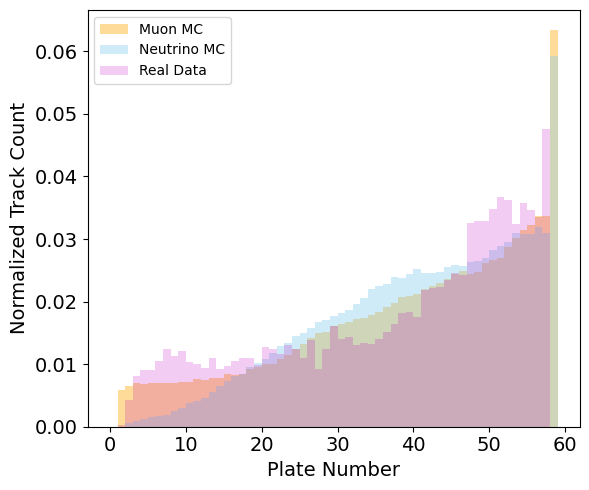

In [55]:
fig, ax = plt.subplots(1, figsize=(6, 5), tight_layout=True)
bins_ = np.arange(0, 60, 1)
alpha = 0.4
ax.hist(60-np.asarray(ak.flatten(muon_vtx['s/s.ePID'])), bins=bins_, alpha=alpha, density=True, label="Muon MC", color='orange')
ax.hist(60-np.asarray(ak.flatten(neutrino_vtx['s/s.ePID'])), bins=bins_, alpha=alpha, density=True, label="Neutrino MC", color='skyblue')
hist = ax.hist(57-np.asarray(ak.flatten(data_vtx['sPID'])), bins=bins_, alpha=alpha-0.2, density=True, label="Real Data", color='m')

ax.set_xlabel("Plate Number", fontsize=14)
ax.set_ylabel("Normalized Track Count", fontsize=14)
ax.legend()
#plt.savefig("Figures/RealVSim/PlateNum_1dHist_SameCuts.pdf")
plt.show()

There does seem to be some correlation with alignment issues and drop offs in track count. For example:
   - plate 10 and 11 (0.0325 --> 0.0242)
   - plate 16 and 17 (0.0219 --> 0.0176)
   
We then looked at the % of base tracks in that plate and the plate number to manually confirm with the alignment. The alignment scans that were inconclusive/showed a double peak were the same ones that had significant drops in count.

In [56]:
pid_list = [(round(hist[0][i]*100, 5), hist[1][i]) for i in range(len(hist[0]))]

for (pct,pl) in pid_list:
    print(str(pl)+": "+str(pct)+"%")

0: 0.0%
1: 0.02888%
2: 0.42729%
3: 0.81083%
4: 0.90355%
5: 0.90789%
6: 1.04268%
7: 1.24339%
8: 1.12803%
9: 1.20716%
10: 1.03848%
11: 1.00593%
12: 0.93355%
13: 1.09424%
14: 0.92705%
15: 0.97242%
16: 1.05366%
17: 1.09761%
18: 1.09846%
19: 0.97878%
20: 1.27493%
21: 1.23466%
22: 1.16062%
23: 1.30881%
24: 1.24778%
25: 1.10045%
26: 1.37886%
27: 0.92878%
28: 1.24599%
29: 1.61709%
30: 1.40549%
31: 1.43293%
32: 1.31133%
33: 1.34517%
34: 1.31653%
35: 1.39783%
36: 1.5084%
37: 1.63892%
38: 1.81349%
39: 1.8328%
40: 1.75771%
41: 2.18853%
42: 2.21946%
43: 2.23452%
44: 2.34023%
45: 2.46156%
46: 2.41987%
47: 3.25283%
48: 3.29332%
49: 3.2807%
50: 3.47196%
51: 3.66764%
52: 3.62605%
53: 3.2404%
54: 3.57111%
55: 3.46471%
56: 3.35248%
57: 4.75619%
58: 0.0%


I then attempted a preliminary analysis of differences in base track % between plates and their neighbors depending on whether they are known to have a douyble peak in alignment or other alignment issue.

In [79]:
# plates that are known to have double peak in alignment between them and the next highest one.
pl_2pk = [3, 8, 10, 14, 17, 23, 26, 28, 36, 37, 40, 41, 46, 47, 48, 49, 53, 54]
good_prevdiffs = [] # current - previous
bad_prevdiffs = [] 
good_postdiffs = [] # current - next
bad_postdiffs = []
good_avgdiffs = [] # current - avg
bad_avgdiffs = []

for i in range(1, len(pid_list)-1):
    (pct, pl) = pid_list[i]
    if pl!=0:
        if pl in pl_2pk:
            bad_prevdiffs += [pct - pid_list[i-1][0]]
        else:
            good_prevdiffs += [pct - pid_list[i-1][0]]
    if pl<57:
        if pl in pl_2pk:
            bad_postdiffs += [pct - pid_list[i+1][0]]
        else:
            good_postdiffs += [pct - pid_list[i+1][0]]
    if pl!=0 and pl<57:
        if pl in pl_2pk:
            bad_avgdiffs += [pct - (pid_list[i-1][0]+ pid_list[i+1][0])/2]
        else:
            good_avgdiffs += [pct - (pid_list[i-1][0]+ pid_list[i+1][0])/2]

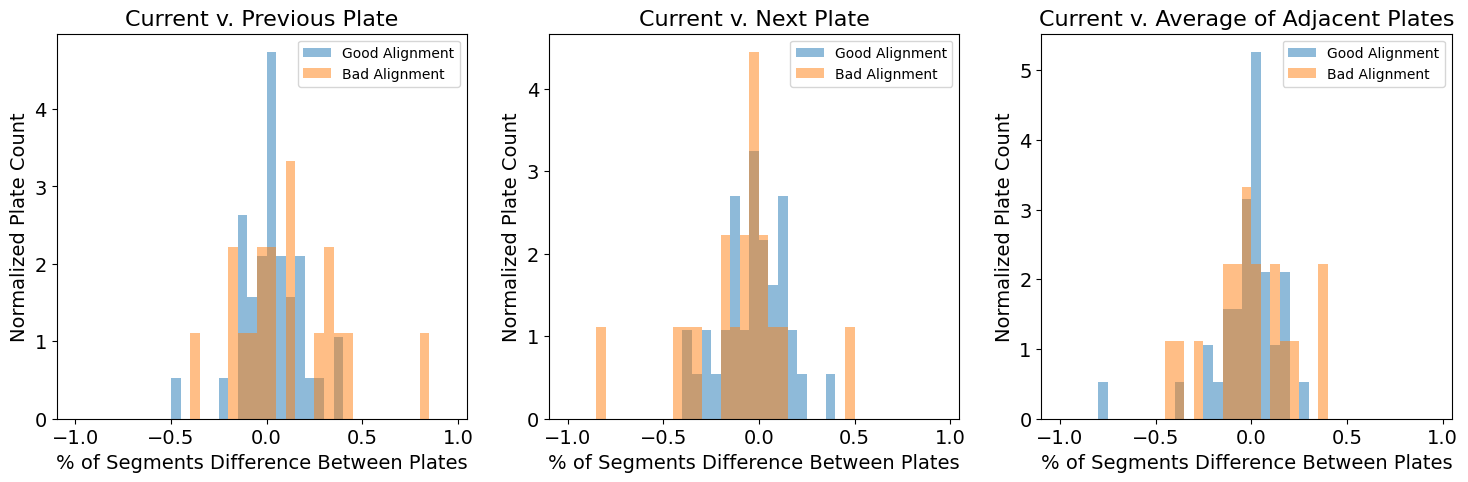

In [98]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
a = 0.5
bins = np.arange(-1, 1, 0.05)
dens = True
ax[0].hist(good_prevdiffs, label="Good Alignment", density=dens, alpha=a, bins=bins)
ax[0].hist(bad_prevdiffs, label="Bad Alignment", density=dens, alpha=a, bins=bins)
ax[0].set_title("Current v. Previous Plate", fontsize=16)

ax[1].hist(good_postdiffs, label="Good Alignment", density=dens, alpha=a, bins=bins)
ax[1].hist(bad_postdiffs, label="Bad Alignment", density=dens, alpha=a, bins=bins)
ax[1].set_title("Current v. Next Plate", fontsize=16)

ax[2].hist(good_avgdiffs, label="Good Alignment", density=dens, alpha=a, bins=bins)
ax[2].hist(bad_avgdiffs, label="Bad Alignment", density=dens, alpha=a, bins=bins)
ax[2].set_title("Current v. Average of Adjacent Plates", fontsize=16)

ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_xlabel("% of Segments Difference Between Plates", fontsize=14)
ax[1].set_xlabel("% of Segments Difference Between Plates", fontsize=14)
ax[2].set_xlabel("% of Segments Difference Between Plates", fontsize=14)

ax[0].set_ylabel("Normalized Plate Count", fontsize=14)
ax[1].set_ylabel("Normalized Plate Count", fontsize=14)
ax[2].set_ylabel("Normalized Plate Count", fontsize=14)
plt.savefig("Figures/RealVtxData/PlateNumDiffs_1dHist.pdf")
plt.show()

From this alone, it is hard to make a conclusive statement, but there does seem to be some amount of correlation.

### Fill factor

I then looked fill factor. A fill factor of 1 means that all of the plates through which the track passed contained a segment, and any less means that there were holes in the track.

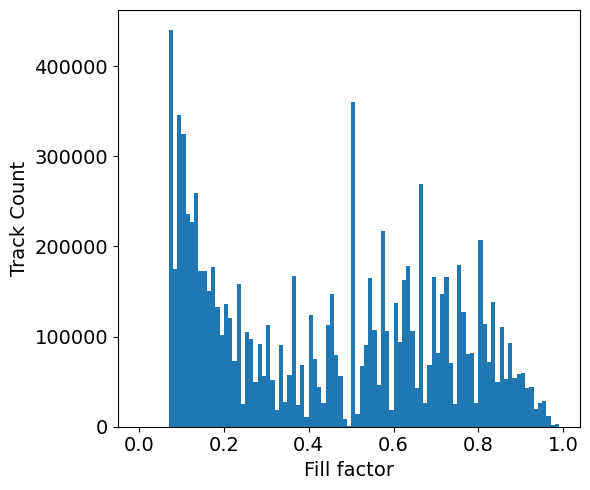

In [109]:
fig, ax = plt.subplots(1, figsize=(6, 5), tight_layout=True)
ax.hist(np.asarray(ak.flatten(data_vtx['fillfact_t'])), bins=np.arange(0, 1, 0.01))
ax.set_xlabel("Fill factor", fontsize=14)
ax.set_ylabel("Track Count", fontsize=14)
plt.savefig("Figures/RealVtxData/Fillfactor_1dHist_track.pdf")
plt.show()

We can also look at fill factor averaged over all the tracks in a given vertex, which smooths out the distribution considerably and has an interesting shape.

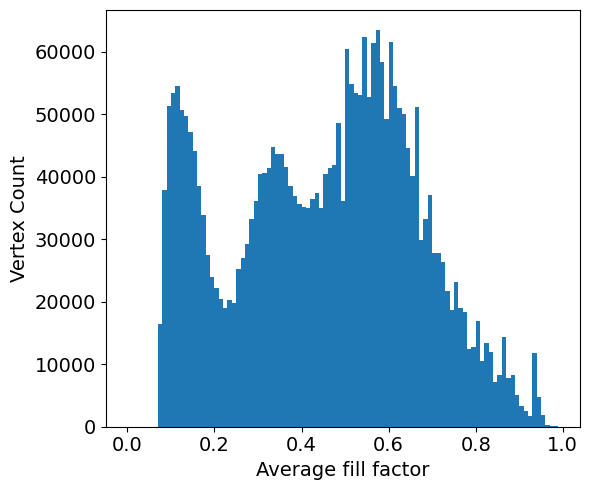

In [116]:
fig, ax = plt.subplots(1, figsize=(6, 5), tight_layout=True)
ax.hist(np.asarray(data_vtx['fillfact']), bins=np.arange(0, 1, 0.01))
ax.set_xlabel("Average fill factor", fontsize=14)
ax.set_ylabel("Vertex Count", fontsize=14)
plt.savefig("Figures/RealVtxData/Fillfactor_1dHist.pdf")
plt.show()

### Segment Reconstruction Efficiency: Nseg/Npl

We can then look at nseg/npl as a proxy for fill factor, which allows for comparison with MC (as MC was not provided with a fill factor variable). We can once again look at fill factor for all tracks or averaged over vertices. 

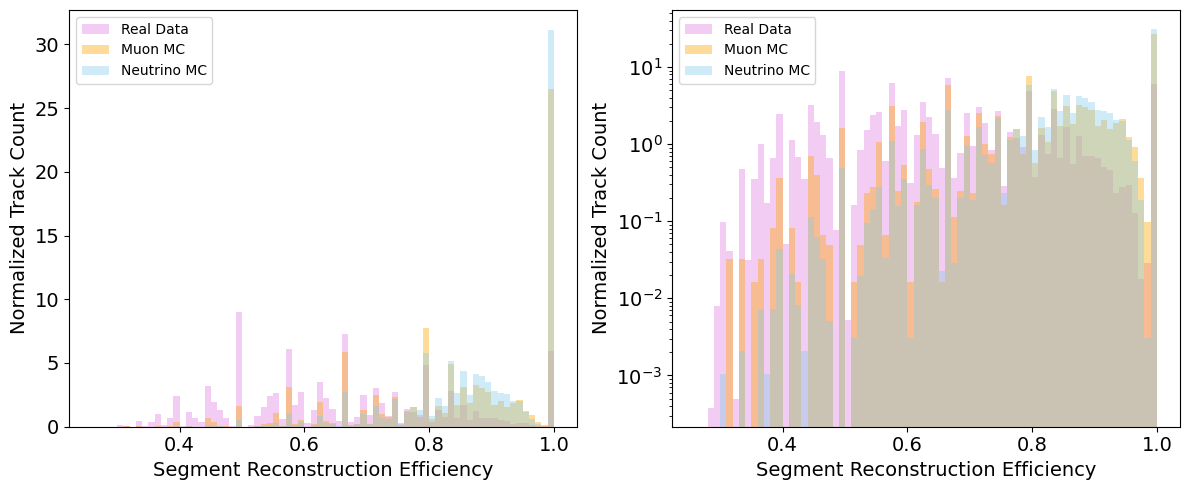

In [193]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)
bins_ = np.arange(0.26, 1.01, 0.01)
alpha = 0.4
ax[0].hist(np.asarray(ak.flatten(data_vtx['nseg']/data_vtx['npl'])), bins=bins_, alpha=alpha-0.2, density=True, label="Real Data", color='m')
ax[0].hist(np.asarray(ak.flatten(muon_vtx['nseg']/muon_vtx['npl'])), bins=bins_, alpha=alpha, density=True, label="Muon MC", color='orange')
ax[0].hist(np.asarray(ak.flatten(neutrino_vtx['nseg']/neutrino_vtx['npl'])), bins=bins_, alpha=alpha, density=True, label="Neutrino MC", color='skyblue')

ax[0].set_xlabel("Segment Reconstruction Efficiency", fontsize=14)
ax[0].set_ylabel("Normalized Track Count", fontsize=14)
ax[0].legend()
ax[1].hist(np.asarray(ak.flatten(data_vtx['nseg']/data_vtx['npl'])), bins=bins_, alpha=alpha-0.2, density=True, label="Real Data", color='m', log=True)
ax[1].hist(np.asarray(ak.flatten(muon_vtx['nseg']/muon_vtx['npl'])), bins=bins_, alpha=alpha, density=True, label="Muon MC", color='orange')
ax[1].hist(np.asarray(ak.flatten(neutrino_vtx['nseg']/neutrino_vtx['npl'])), bins=bins_, alpha=alpha, density=True, label="Neutrino MC", color='skyblue')

ax[1].set_xlabel("Segment Reconstruction Efficiency", fontsize=14)
ax[1].set_ylabel("Normalized Track Count", fontsize=14)
ax[1].legend()
plt.savefig("Figures/RealVSim/Nseg_Npl_1dHist_SameCuts.pdf")
plt.show()

Unlike the rest of the plots, the segment reconstruction efficiency of the MC is much too high compared to the data, which is especially clear when we average over vertices. 

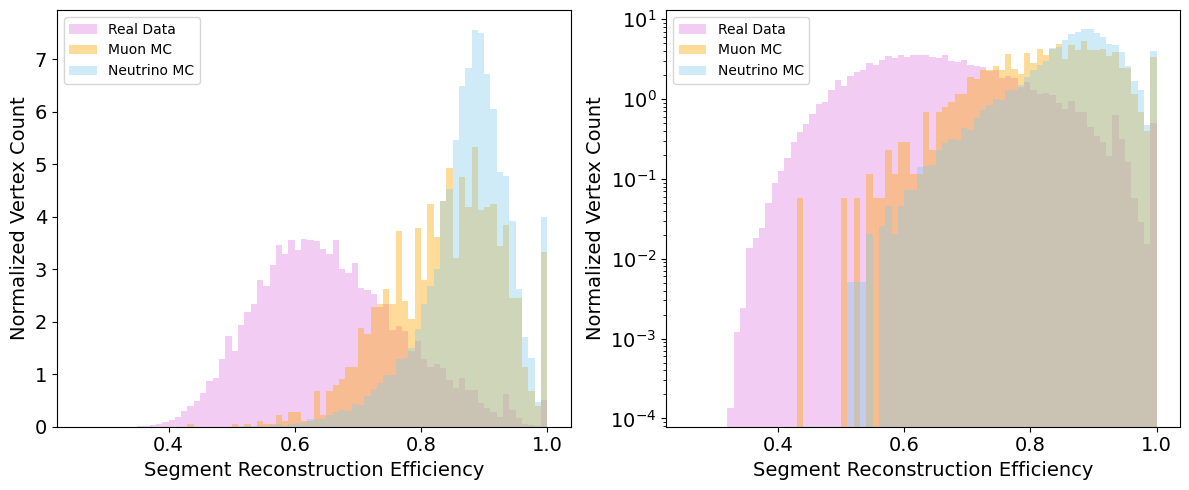

In [194]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)
bins_ = np.arange(0.26, 1.01, 0.01)
alpha = 0.4
ax[0].hist(np.asarray(ak.mean(data_vtx['nseg']/data_vtx['npl'], axis=1)), bins=bins_, alpha=alpha-0.2, density=True, label="Real Data", color='m')
ax[0].hist(np.asarray(ak.mean(muon_vtx['nseg']/muon_vtx['npl'], axis=1)), bins=bins_, alpha=alpha, density=True, label="Muon MC", color='orange')
ax[0].hist(np.asarray(ak.mean(neutrino_vtx['nseg']/neutrino_vtx['npl'], axis=1)), bins=bins_, alpha=alpha, density=True, label="Neutrino MC", color='skyblue')

ax[0].set_xlabel("Segment Reconstruction Efficiency", fontsize=14)
ax[0].set_ylabel("Normalized Vertex Count", fontsize=14)
ax[0].legend()
ax[1].hist(np.asarray(ak.mean(data_vtx['nseg']/data_vtx['npl'], axis=1)), bins=bins_, alpha=alpha-0.2, density=True, label="Real Data", color='m', log=True)
ax[1].hist(np.asarray(ak.mean(muon_vtx['nseg']/muon_vtx['npl'], axis=1)), bins=bins_, alpha=alpha, density=True, label="Muon MC", color='orange')
ax[1].hist(np.asarray(ak.mean(neutrino_vtx['nseg']/neutrino_vtx['npl'], axis=1)), bins=bins_, alpha=alpha, density=True, label="Neutrino MC", color='skyblue')

ax[1].set_xlabel("Segment Reconstruction Efficiency", fontsize=14)
ax[1].set_ylabel("Normalized Vertex Count", fontsize=14)
ax[1].legend()
plt.savefig("Figures/RealVSim/Mean_Nseg_Npl_1dHist_SameCuts.pdf")
plt.show()

This is weird, and we must figure out what is causing the discrepancy to ensure our MC is a faithful representation of the data. What if we randomly delete some segments of the MC to see if it follows the data distribution? We should do this before tracking, to see how it affects the reconstruction efficiency.

### Manually lowering efficiency

I used the segment ID to remove 1 in 4, 6, or 8 tracks in the MC prior to reconstruction, in an attempt to lower the efficiency to match the data. While this did somewhat help the segment reconstruction efficiency, it did not solve the issue. The MC was still far from the data. 

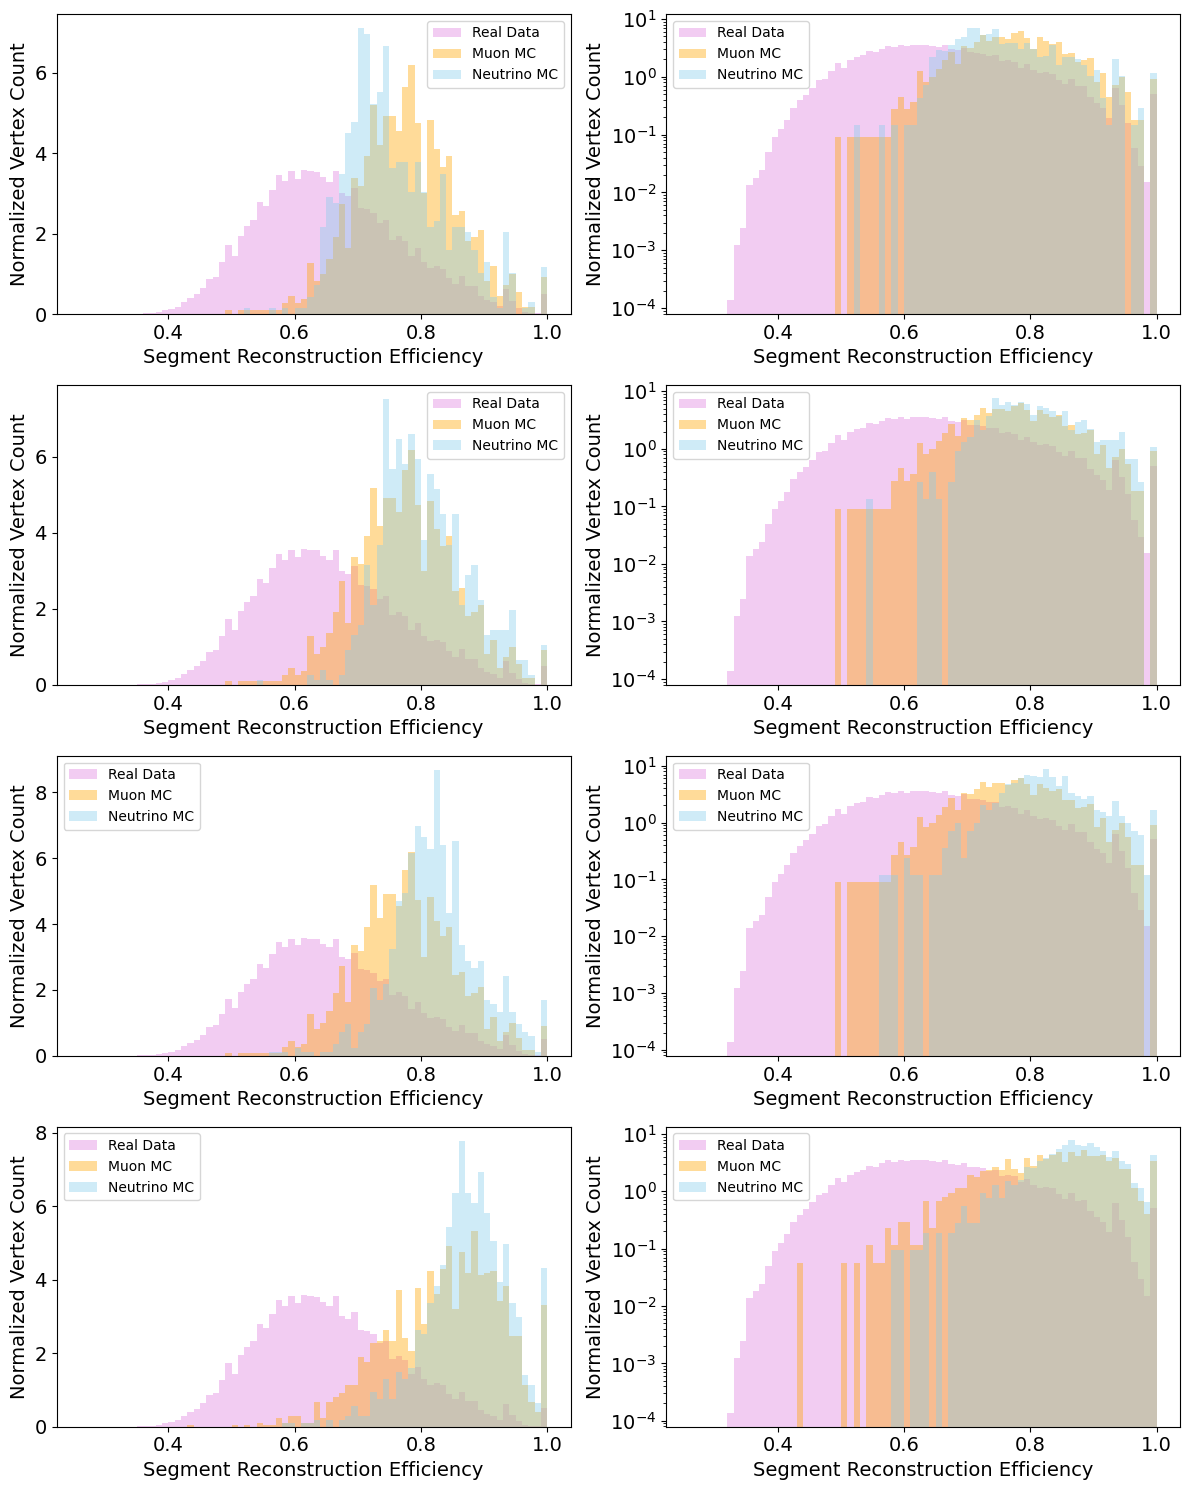

In [37]:
p = [(mu4_vtx, neu4_vtx), (mu6_vtx, neu6_vtx), (mu8_vtx, neu8_vtx), (muon_vtx, neutrino_vtx)]

fig, ax = plt.subplots(len(p), 2, figsize=(12, 15), tight_layout=True)
bins_ = np.arange(0.26, 1.01, 0.01)
alpha = 0.4
for i in range(len(p)):
    ax[i,0].hist(np.asarray(ak.mean(data_vtx['nseg']/data_vtx['npl'], axis=1)), bins=bins_, alpha=alpha-0.2, density=True, label="Real Data", color='m')
    ax[i,0].hist(np.asarray(ak.mean((p[i][0]['nseg']/p[i][0]['npl']), axis=1)), bins=bins_, alpha=alpha, density=True, label="Muon MC", color='orange')
    ax[i,0].hist(np.asarray(ak.mean((p[i][1]['nseg']/p[i][1]['npl']), axis=1)), bins=bins_, alpha=alpha, density=True, label="Neutrino MC", color='skyblue')

    ax[i,0].set_xlabel("Segment Reconstruction Efficiency", fontsize=14)
    ax[i,0].set_ylabel("Normalized Vertex Count", fontsize=14)
    ax[i,0].legend()
    ax[i,1].hist(np.asarray(ak.mean(data_vtx['nseg']/data_vtx['npl'], axis=1)), bins=bins_, alpha=alpha-0.2, density=True, label="Real Data", color='m', log=True)
    ax[i,1].hist(np.asarray(ak.mean((p[i][0]['nseg']/p[i][0]['npl']), axis=1)), bins=bins_, alpha=alpha, density=True, label="Muon MC", color='orange')
    ax[i,1].hist(np.asarray(ak.mean((p[i][1]['nseg']/p[i][1]['npl']), axis=1)), bins=bins_, alpha=alpha, density=True, label="Neutrino MC", color='skyblue')

    ax[i,1].set_xlabel("Segment Reconstruction Efficiency", fontsize=14)
    ax[i,1].set_ylabel("Normalized Vertex Count", fontsize=14)
    ax[i,1].legend()
plt.savefig("Figures/RealVSim/Mean_Nseg_Npl_1dHist_SelSegs_SameCuts.pdf")
plt.show()

## BDT Output

I finally plotted the BDT output of the data, to see what it was. I'll get back to this more when I need to distinguish background and signal.

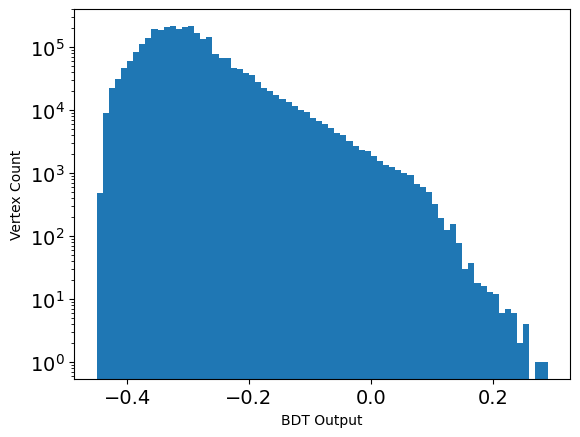

In [103]:
fig, ax = plt.subplots()
ax.hist(data_vtx['BDT'], bins=np.arange(-0.45, 0.3, 0.01), log=True)
ax.set_xlabel("BDT Output")
ax.set_ylabel("Vertex Count")
plt.show()